# Detecting offense
## Natural Language Processing

Authors:

- Eduardo Carneiro - 202003218
- Monika Stepien - 202010254
- Tomás Santos - 202003219

## Introduction

This notebook was developed for the Artificial Intelligence course at FEUP using Jupyter Notebook and Python. The main objective of this project is to study different Machine Learning algorithms applied in the Natural Language Processing context. Our group's study case consists of detecting offense in texts.

This notebook has the following structure:

- Problem Description
- Data: Explanation and Exploratory Analysis
- Pre-processing: Techniques and Procedures applied
- Feature Engineering and Machine Learning Algorithms: Application of different ML algorithms such as SVM, KNN, NN, etc.
- Conclusion and Future Work
- References

## Problem Description
TODO: PROBLEM DESCRIPTION

## Data

In this section we explore the data provided and demonstrate how it was analyzed. 

### Explanation

#### Imports

First, all the used libraries and packages are installed using pip with the '--quiet' flag in order to prevent logs.

In [35]:
import sys  
!{sys.executable} -m pip install contractions --quiet
!{sys.executable} -m pip install unidecode --quiet
!{sys.executable} -m pip install emoji --quiet
!{sys.executable} -m pip install tidytext --quiet
!{sys.executable} -m pip install plotnine --quiet
!{sys.executable} -m pip install grid --quiet

#### Importing the data

To read the data, we used pandas which allowed us to easily manipulate dataframes. Considering our dataset is shared with another project, there are columns that are not relevent in the context of our work. Therefore, while importing the data we only use the text and offense_rating columns.

In [38]:
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
%matplotlib inline

init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

# Importing the dataset
dataset = pd.read_csv('train.csv', delimiter = ',', usecols=["text", "offense_rating"])

display(dataset)


,text,offense_rating
0,TENNESSEE: We're the best state. Nobody even c...,0.20
1,A man inserted an advertisement in the classif...,1.10
2,How many men does it take to open a can of bee...,2.40
3,Told my mom I hit 1200 Twitter followers. She ...,0.00
4,Roses are dead. Love is fake. Weddings are bas...,0.10
...,...,...
7995,Lack of awareness of the pervasiveness of raci...,0.25
7996,Why are aspirins white? Because they work sorry,3.85
7997,"Today, we Americans celebrate our independence...",0.00
7998,How to keep the flies off the bride at an Ital...,3.00


### Exploratory Analysis

The first step was to verify if there were any empty values in the imported data, both in the text and the offense rating. 

#### Check if there are no empty values

In [34]:
print("Number of empty texts: %d" % len(dataset[dataset['text'] == '']))
print("Number of empty ratings: %d" % len(dataset[dataset['offense_rating'] == '']))

Number of empty texts: 0
Number of empty ratings: 0


As the results show, none of the entries have empty values, so removing rows was not necessary.

#### Rating Distribution
Next, we plotted the offense rating distribution in order to understand if the values were balanced across the dataset.
For this, we used 'iplot' which allowed us to present a histogram with the distribution for small groups of ratings. Showing all the individual ratings would make reading the plot and understanding the data very hard, defeating its purpose. 

In [4]:
dataset['offense_rating'].iplot(
    kind='hist',
    bins=50,
    xTitle='Offense Rating',
    linecolor='black',
    yTitle='count',
    title='Offense Rating Distribution')

### The offense rating mean:

In [5]:
mean = dataset['offense_rating'].mean()
print("Mean value for offense rating:", mean)

Mean value for offense rating: 0.5853250000000031


### The offense rating median:

In [6]:
median = dataset['offense_rating'].median()
print("Median value for offense rating:", median)

Median value for offense rating: 0.1


### The offense rating mode:

In [7]:
modeOffense = dataset['offense_rating'].mode()
print("Mode value for offense rating:", modeOffense)

Mode value for offense rating: 0    0.0
dtype: float64


### The offense rating variance:

In [8]:
variance = dataset['offense_rating'].var()
print("Variance value for offense rating:", variance)

Variance value for offense rating: 0.960312183397919


### The offense rating standard deviation:

In [9]:
std = dataset['offense_rating'].std()
print("Standard Deviation value for offense rating:", std)

Standard Deviation value for offense rating: 0.9799551945869357


### The offense rating skewness:

In [10]:
skewness = dataset['offense_rating'].skew()
print("Skewness value for offense rating:", skewness)

Skewness value for offense rating: 2.025170682712623


### TF-IDF per class (after discretization)

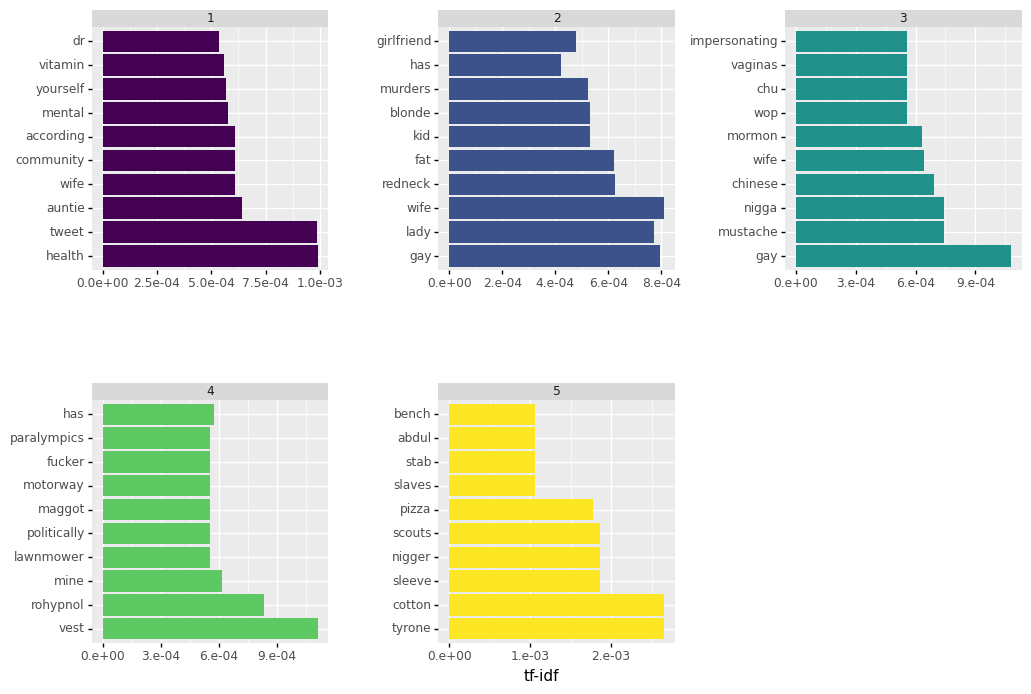

<ggplot: (98369494107)>

In [32]:
import nltk
nltk.download('punkt', quiet=True)
from tidytext import unnest_tokens, bind_tf_idf 
from siuba import _, count, arrange
from plotnine import ggplot, aes, geom_col, geom_bar, labs, coord_flip, theme, facet_wrap
from plotnine import facet_grid, scale_y_continuous
import warnings
from mizani.formatters import scientific_format

warnings.filterwarnings('ignore')

def tokenize(text):
    text =  nltk.WordPunctTokenizer().tokenize(text)
    return text

def discretization(value):
    if (value >= 0 and value < 1):
        value = 1
    elif (value >= 1 and value < 2):
        value = 2
    elif (value >= 2 and value < 3):
        value = 3
    elif(value >= 3 and value < 4):
        value = 4
    elif(value >= 4):
        value = 5
    return value
        
tf_idf_dataset = dataset.copy()

tf_idf_dataset["offense_rating_class"] = list(map(discretization, tf_idf_dataset.offense_rating))


tf_idf_dataset = (tf_idf_dataset
  >> unnest_tokens(_.word, _.text)
  >> count(_.offense_rating_class, _.word)
  >> bind_tf_idf(_.word, _.offense_rating_class, _.n)
  >> arrange(-_.tf_idf)
)


tf_idf_dataset = tf_idf_dataset.sort_values(by='tf_idf', ascending=False)

tf_idf_dataset = tf_idf_dataset.groupby(['offense_rating_class']).head(n = 10)

(ggplot(tf_idf_dataset, aes(x = 'reorder(word, -tf_idf)', y = "tf_idf", fill = "offense_rating_class"))
    + scale_y_continuous(labels=scientific_format(digits=2))
    + geom_col()
    + labs(x = None, y = "tf-idf")
    + coord_flip()
    + theme(legend_position = "none", panel_spacing = 1.1, figure_size=(12, 8))
    + facet_wrap("offense_rating_class", scales = "free", ncol= 3)
    + geom_bar(stat = "identity")
)



## Pre-processing
TODO: DIFFERENT TECHINQUES

#### To help normalize the text, it should all be converterd to lower case.

In [ ]:
processed_data = dataset.copy()
processed_data["text"] = processed_data['text'].str.lower()
print(dataset)
print(processed_data)

#### Then, the contractions, accents and emojis should be removed, since it doesn't add meaning to sentences:

In [ ]:
import contractions
import unicodedata
import emoji

def contract(text):
    
    text = unicodedata.normalize('NFKD', text)
    text = "".join([c for c in text if not unicodedata.combining(c)])
    text = emoji.demojize(text)
    
    expanded_words = []    

    for word in text.split():
      # using contractions.fix to expand the shotened words
      expanded_words.append(contractions.fix(word))   
    
    expanded_text = ' '.join(expanded_words)
    return expanded_text

processed_data["text"] = list(map(contract, processed_data.text))
print(processed_data)


#### Removing punctuation:

In [ ]:
import re

def remove_punctuation(text):  
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    return text

processed_data["text"] = list(map(remove_punctuation, processed_data.text))

print(processed_data)

#### Removing stopwords

In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(text):  
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

processed_data["text"] = list(map(remove_stopwords, processed_data.text))
print(processed_data)

#### Tokenizing text

In [ ]:
processed_data["text"] = list(map(tokenize, processed_data.text))

print(processed_data)

#### Splitting data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
percentage = 0.8
data_train, data_test = train_test_split(processed_data, train_size = percentage)

data_train_lem = data_train.copy()
data_test_lem = data_test.copy()

data_train_stem = data_train.copy()
data_test_stem = data_test.copy()

#### Lemmatizing:

In [ ]:
# Lemmatizing

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def lemmatized_words(dataset):
    lemm = nltk.stem.WordNetLemmatizer()
    dataset['text'] = list(map(lambda word:
                                     list(map(lemm.lemmatize, word)),
                                     dataset.text))
    
lemmatized_words(data_train_lem)
lemmatized_words(data_test_lem)

def join_tokens(text):
    text = " ".join(text)
    text.strip()
    return text

data_train_lem["text"] = list(map(join_tokens, data_train_lem.text))
data_train_lem["text"] = data_train_lem["text"].str.strip()

data_test_lem["text"] = list(map(join_tokens, data_test_lem.text))
data_test_lem["text"] = data_test_lem["text"].str.strip()

print(data_train_lem)
print(data_test_lem)

#### Stemming:

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem(text):
    text = ' '.join([ps.stem(w) for w in text])
    return text

data_train_stem["text"] = list(map(stem, data_train_stem.text))
data_train_stem["text"] = data_train_stem["text"].str.strip()

data_test_stem["text"] = list(map(stem, data_test_stem.text))
data_test_stem["text"] = data_test_stem["text"].str.strip()

print(data_train_stem)
print(data_test_stem)

## Feature Engineering and Machine Learning Algorithms
TODO: MORE TEXT

### Using an SVR algorithm

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVR
import time

# This is already using the "optimal" parameters
svr_lem_model = Pipeline([('vect', CountVectorizer(ngram_range = (1, 1), stop_words='english')),
                          ('tfidf', TfidfTransformer(use_idf = False)), ('svr', SVR(kernel = "rbf", 
                            C = 1000.0, shrinking = True, gamma = "scale"))])

start_time = time.time()

svr_lem_model = svr_lem_model.fit(data_train_lem.text, data_train_lem.offense_rating)

print("Training time for the lemmatied text: %s seconds." % (time.time() - start_time))

# =================================================================================================

# This is already using the "optimal" parameters
svr_stem_model = Pipeline([('vect', CountVectorizer(ngram_range = (1, 1), stop_words='english')), 
                           ('tfidf', TfidfTransformer(use_idf = False)), ('svr', SVR(kernel = "rbf",
                            C = 1000.0, shrinking = True, gamma = "scale"))])

start_time = time.time()

svr_stem_model = svr_stem_model.fit(data_train_stem.text, data_train_stem.offense_rating)

print("Training time for the stemmed text: %s seconds." % (time.time() - start_time))


### Grid search to determine best parameters
#### Parameters for the lemmatization model
This takes a while to run so here are the best parameters for the model used with lemmatized text:
- svr__gamma: 'scale'
- svr__kernel: 'rbf'
- svr__shrinking: True
- tfidf__use_idf: False
- vect__ngram_range: (1, 1)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_svr = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
               'svr__kernel': ("linear", "poly", "rbf", "sigmoid", "precomputed"),
                   'svr__shrinking': (True, False),
                   'svr__gamma': ("scale", "auto"),
}
gs_svr = GridSearchCV(svr_lem_model, parameters_svr, n_jobs=-1)
gs_svr = gs_svr.fit(data_train_lem.text, data_train_lem.offense_rating)
gs_svr.best_score_
gs_svr.best_params_

#### Parameters for the stemming model
This takes a while to run so here are the best parameters for the model used with stemmed text:
- svr__gamma: 'scale'
- svr__kernel: 'rbf'
- svr__shrinking: True
- tfidf__use_idf: False
- vect__ngram_range: (1, 1)

In [ ]:
parameters_svr = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
               'svr__kernel': ("linear", "poly", "rbf", "sigmoid", "precomputed"),
                   'svr__shrinking': (True, False),
                   'svr__gamma': ("scale", "auto"),
}
gs_svr = GridSearchCV(svr_stem_model, parameters_svr, n_jobs=-1)
gs_svr = gs_svr.fit(data_train_stem.text, data_train_stem.offense_rating)
gs_svr.best_score_
gs_svr.best_params_

### Metrics for the SVR

#### MSE, RMSE and MAE for the SVR model trained with lemmatized text

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
predicted = svr_lem_model.predict(data_test_lem.text)
true = data_test_lem.offense_rating
print("Mean squared error: %s." % mean_squared_error(true, predicted))
print("Root mean squared error: %s." % mean_squared_error(true, predicted, squared = False))
print("Mean absolute error: %s." % mean_absolute_error(true, predicted))
print("R squared: %s." % r2_score(true, predicted))

#### MSE and RMSE for the SVR model trained with stemmed text

In [ ]:
predicted = svr_stem_model.predict(data_test_stem.text)
true = data_test_stem.offense_rating
print("Mean squared error: %s." % mean_squared_error(true, predicted))
print("Root mean squared error: %s." % mean_squared_error(true, predicted, squared = False))
print("Mean absolute error: %s." %mean_absolute_error(true, predicted))
print("R squared: %s." % r2_score(true, predicted))

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# This is already using the "optimal" parameters
knn_lem_model = Pipeline([('vect', CountVectorizer(ngram_range = (1, 1), stop_words='english')),
                          ('tfidf', TfidfTransformer(use_idf = True)), ('knn', KNeighborsRegressor(n_neighbors = 10))])

start_time = time.time()

knn_lem_model = knn_lem_model.fit(data_train_lem.text, data_train_lem.offense_rating)

print("Training time for the lemmatied text: %s seconds." % (time.time() - start_time))

# =================================================================================================

# This is already using the "optimal" parameters
knn_stem_model = Pipeline([('vect', CountVectorizer(ngram_range = (1, 1), stop_words='english')), 
                           ('tfidf', TfidfTransformer(use_idf = False)), ('knn', KNeighborsRegressor(n_neighbors = 10))])

start_time = time.time()

knn_stem_model = knn_stem_model.fit(data_train_stem.text, data_train_stem.offense_rating)

print("Training time for the stemmed text: %s seconds." % (time.time() - start_time))

### Grid search to determine the best parameters

#### Parameters for the lemmatized text 

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_knn = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
               #TODO: continue
}
gs_svr = GridSearchCV(svr_lem_model, parameters_svr, n_jobs=-1)
gs_svr = gs_svr.fit(data_train_lem.text, data_train_lem.offense_rating)
gs_svr.best_score_
gs_svr.best_params_

### Metrics for the KNN

#### MSE, RMSE and MAE for the KNN model trained with lemmatized text

In [ ]:
predicted = knn_lem_model.predict(data_test_lem.text)
true = data_test_lem.offense_rating
print("Mean squared error: %s." % mean_squared_error(true, predicted))
print("Root mean squared error: %s." % mean_squared_error(true, predicted, squared = False))
print("Mean absolute error: %s." % mean_absolute_error(true, predicted))
print("R squared: %s." % r2_score(true, predicted))

#### MSE and RMSE for the KNN model trained with stemmed text

In [ ]:
predicted = svr_stem_model.predict(data_test_stem.text)
true = data_test_stem.offense_rating
print("Mean squared error: %s." % mean_squared_error(true, predicted))
print("Root mean squared error: %s." % mean_squared_error(true, predicted, squared = False))
print("Mean absolute error: %s." %mean_absolute_error(true, predicted))
print("R squared: %s." % r2_score(true, predicted))

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# This is already using the "optimal" parameters
dt_lem_model = Pipeline([('vect', CountVectorizer(ngram_range = (1, 1), stop_words='english')),
                          ('tfidf', TfidfTransformer(use_idf = True)), ('dt', DecisionTreeRegressor())])

start_time = time.time()

dt_lem_model = dt_lem_model.fit(data_train_lem.text, data_train_lem.offense_rating)

print("Training time for the lemmatied text: %s seconds." % (time.time() - start_time))

# =================================================================================================

# This is already using the "optimal" parameters
dt_stem_model = Pipeline([('vect', CountVectorizer(ngram_range = (1, 1), stop_words='english')), 
                           ('tfidf', TfidfTransformer(use_idf = False)), ('dt', DecisionTreeRegressor())])

start_time = time.time()

dt_stem_model = dt_stem_model.fit(data_train_stem.text, data_train_stem.offense_rating)

print("Training time for the stemmed text: %s seconds." % (time.time() - start_time))

### Metrics for the Decision Tree

#### MSE, RMSE and MAE for the Decision Tree model trained with lemmatized text

In [ ]:
predicted = dt_lem_model.predict(data_test_lem.text)
true = data_test_lem.offense_rating
print("Mean squared error: %s." % mean_squared_error(true, predicted))
print("Root mean squared error: %s." % mean_squared_error(true, predicted, squared = False))
print("Mean absolute error: %s." % mean_absolute_error(true, predicted))
print("R squared: %s." % r2_score(true, predicted))

#### MSE and RMSE for the Decision Tree model trained with stemmed text

In [ ]:
predicted = dt_stem_model.predict(data_test_stem.text)
true = data_test_stem.offense_rating
print("Mean squared error: %s." % mean_squared_error(true, predicted))
print("Root mean squared error: %s." % mean_squared_error(true, predicted, squared = False))
print("Mean absolute error: %s." %mean_absolute_error(true, predicted))
print("R squared: %s." % r2_score(true, predicted))

## Conclusion and Future Work
TODO: THIS

## References
TODO: STUFF